In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('credit_risk_dataset.csv')

In [5]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
# removing rows with N/A values
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

In [7]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [8]:
df.shape

(28638, 12)

In [9]:
df.nunique()

person_age                      57
person_income                 3835
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      728
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [11]:
# identifying the values for the categorical variables 
categories = df.dtypes[df.dtypes == 'object'].index.to_list()
for i in categories:
    k = df[i].unique()
    print(f"{i}: {k}")

person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade: ['D' 'B' 'C' 'A' 'E' 'F' 'G']
cb_person_default_on_file: ['Y' 'N']


# Identifying Data Issues

In [13]:
df.query('person_emp_length > person_age')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
186,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


## Person Employment Length

In [15]:
df['person_emp_length'].sort_values(ascending=False).iloc[0:10]

0        123.0
186      123.0
28440     41.0
28580     38.0
28504     34.0
27182     31.0
28363     31.0
28018     31.0
28019     31.0
28621     30.0
Name: person_emp_length, dtype: float64

In [16]:
# Determining average employment length within five year age gaps
df.groupby(pd.cut(df['person_age'], np.arange(0, 150, step=5)), observed=True)['person_emp_length'].mean()

person_age
(15, 20]       3.285714
(20, 25]       4.047672
(25, 30]       5.177050
(30, 35]       5.580052
(35, 40]       5.920256
(40, 45]       6.210383
(45, 50]       6.348243
(50, 55]       5.465649
(55, 60]       5.671875
(60, 65]       7.655172
(65, 70]       4.473684
(70, 75]       3.500000
(75, 80]      23.666667
(80, 85]       2.000000
(120, 125]     2.000000
(140, 145]     6.666667
Name: person_emp_length, dtype: float64

In [17]:
df.iloc[0, 3] = 4
df.iloc[186, 3] = 4

## Person Age

In [19]:
df['person_age'].sort_values(ascending=False).iloc[0:10]

74       144
28388    144
163      144
508      123
28572     84
28498     80
28440     78
28598     76
28463     73
28586     73
Name: person_age, dtype: int64

In [20]:
# removing rows with impossible ages
df.drop([74, 28388, 163, 508], inplace=True)

In [21]:
df.reset_index(inplace=True, drop=True)

# Visualizing

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

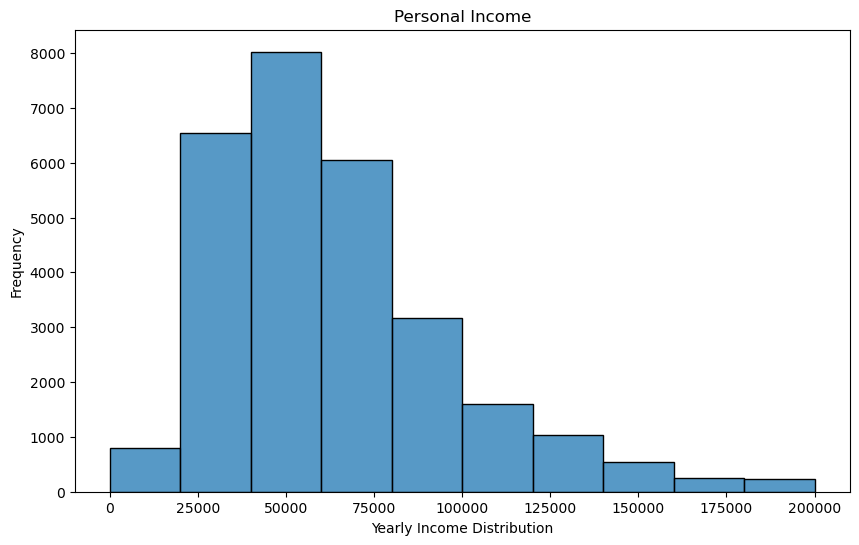

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='person_income', bins=np.arange(0, 220000, step=20000))
plt.title('Personal Income')
plt.xlabel('Yearly Income Distribution')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

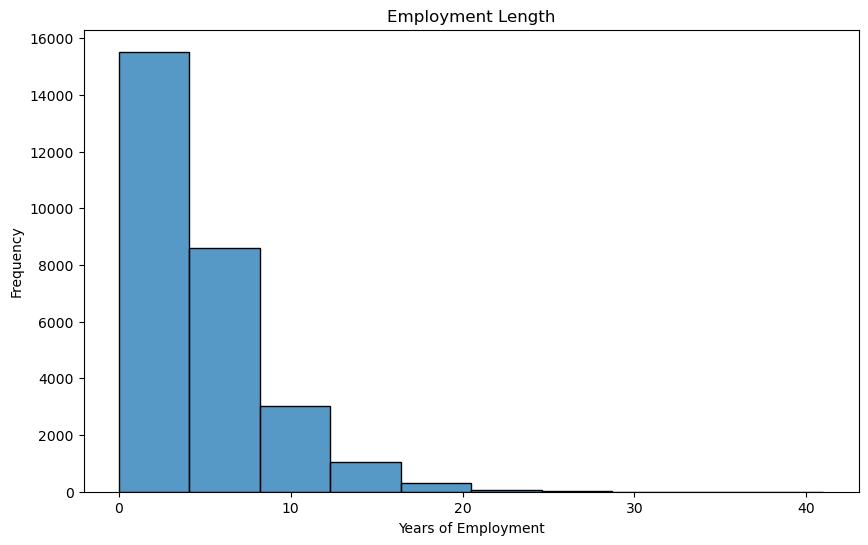

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='person_emp_length', bins=10)
plt.title('Employment Length')
plt.xlabel('Years of Employment')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [137]:
target_dist_count = [sum(df['loan_status']==0), sum(df['loan_status']==1)]
target_dist_labels = ['Non-Default','Default']

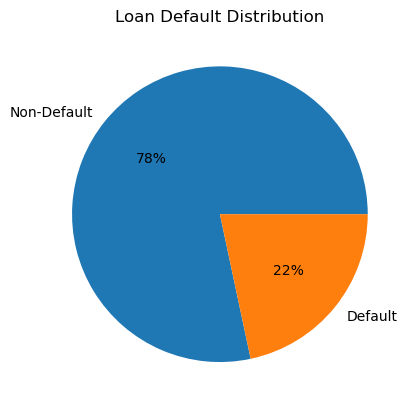

In [145]:
plt.pie(target_dist_count, labels=target_dist_labels, autopct='%.0f%%')
plt.title('Loan Default Distribution')
plt.show()

# Setup and Running Models

In [27]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score, roc_curve

In [28]:
X_pre = df.drop("loan_status", axis=1)
y = df["loan_status"]

In [29]:
numeric_columns = X_pre.select_dtypes(exclude=['object']).columns
categorical_columns = X_pre.select_dtypes(include=['object']).columns

In [30]:
pipeline=ColumnTransformer([
    ('num', StandardScaler(), numeric_columns),
    ('cat', OneHotEncoder(), categorical_columns),
])

In [31]:
X=pipeline.fit_transform(X_pre)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [34]:
logreg = LogisticRegression(max_iter=200, random_state=7)

In [35]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=7)

In [36]:
y_pred_log = logreg.predict(X_test)

In [37]:
cnf_matrix_log = confusion_matrix(y_test, y_pred_log)

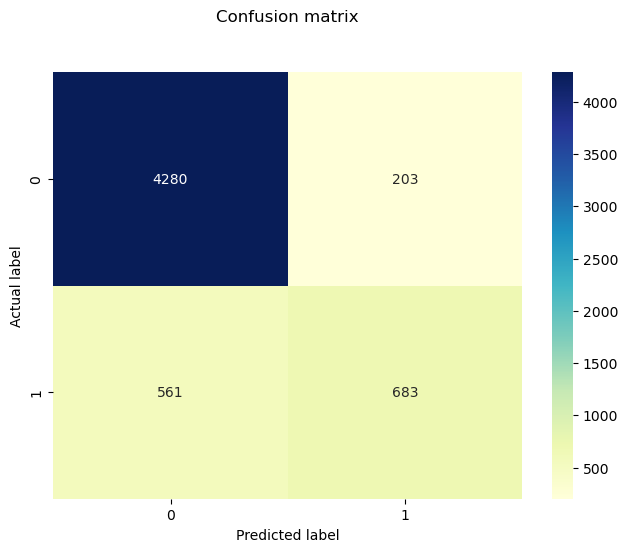

In [38]:
sns.heatmap(cnf_matrix_log, cmap = 'YlGnBu', annot=True, fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [39]:
f1_logit = f1_score(y_test, y_pred_log)
precision_logit = precision_score(y_test, y_pred_log)
recall_logit = recall_score(y_test, y_pred_log)

In [40]:
print('Logistic Regression Scoring')
print('F1 Score: ', round(f1_score(y_test, y_pred_log), 2))
print('Accuracy: ', round(accuracy_score(y_test, y_pred_log), 2))
print('Precision: ', round(precision_score(y_test, y_pred_log), 2))
print('Recall: ', round(recall_score(y_test, y_pred_log), 2))

Logistic Regression Scoring
F1 Score:  0.64
Accuracy:  0.87
Precision:  0.77
Recall:  0.55


In [41]:
y_pred_log_prob = logreg.predict_proba(X_test)[:, 1]

In [42]:
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_log_prob) 

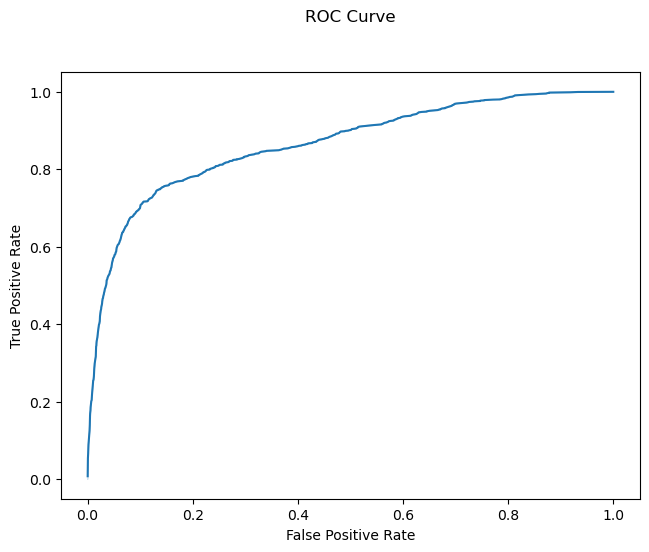

In [105]:
sns.lineplot(x=fpr_log, y=tpr_log)
plt.tight_layout()
plt.title('Logistic Regression ROC Curve', y=1.1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Support Vector Machine

In [ ]:
from sklearn import svm

In [ ]:
svm_classifier = svm.SVC()

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
tree = tree_classifier.estimators_[0]
dot_data = export_graphviz(tree,
                           feature_names=X_train2.columns,
                           max_depth=2)
graph = graphviz.Source(dot_data)
display(graph)